In [80]:
import ms3 
from  ms3.utils import *
import os 
from ms3 import Score
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
path_midi = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/'
target = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/'

dir_list = os.listdir(path_midi)

for el in dir_list:
    convert(path_midi+el, target+el[:-4]+'.mscx', MS='musescore3')

INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/Dont let me down-The chainsmokers, Halsey.mid to /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/Dont let me down-The chainsmokers, Halsey.mscx
INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/Cheap Thrills(feat. Sean Paul)-Sia, Sean Paul.mid to /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/Cheap Thrills(feat. Sean Paul)-Sia, Sean Paul.mscx
INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/New rules-Dua Lipa.mid to /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/New rules-Dua Lipa.mscx
INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/Let Me Love You ft Justin Bieber-DJ Snake, Justin Bieber.mid to /hom

In [73]:
shape_of_you = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/Shape of you-Ed Sheran.mscx'
s = Score(shape_of_you)
df_shape_of_you = s.mscx.notes

In [82]:
df_shape_of_you['quarter_beats'] = (df_shape_of_you.mc_onset*16).astype('int32')
print(len(df_shape_of_you))

1387


,count
quarter_beats,
0,400
1,6
2,57
3,5
4,83
5,36
6,200
7,31
8,136


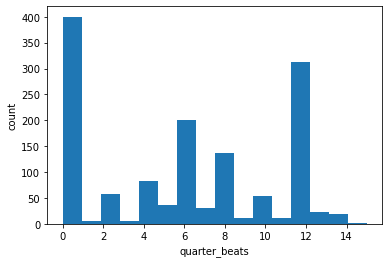

In [76]:
df_histogram = df_shape_of_you.groupby(['quarter_beats'])['mn'].agg(['count'])

plt.hist(df_shape_of_you['quarter_beats'], bins=16)
plt.xlabel('quarter_beats')
plt.ylabel('count')
df_histogram

In [88]:
#s.mscx.metadata
dir_sheet_music = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/'
list_sheet_music = os.listdir(dir_sheet_music)

for idx, el in enumerate(list_sheet_music):
    s = Score(dir_sheet_music+el)
    df = s.mscx.notes
    if idx == 0:
        df_score = df
    else: df_score = pd.concat([df_score, df], axis = 0)

,count
quarter_beats,
0,2836
1,671
2,792
3,931
4,1477
5,282
6,1218
7,238
8,1909


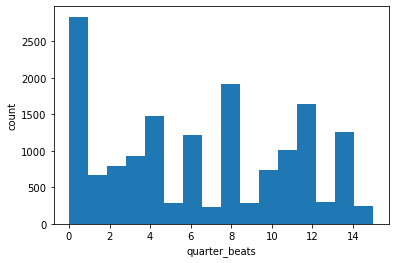

In [89]:
df_score['quarter_beats'] = (df_score.mc_onset*16).astype('int32')
df_histogram = df_score.groupby(['quarter_beats'])['mn'].agg(['count'])

plt.hist(df_score['quarter_beats'], bins=16)
plt.xlabel('quarter_beats')
plt.ylabel('count')
df_histogram